In [290]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [291]:
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        SELECT * FROM 
                            Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
                    '''
master_statement2  = '''
                        SELECT LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea, OverallQual, GarageCars from Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
							
                    '''

df = pd.read_sql_query(master_statement, conn)
df.drop(['Aeminities_id'], axis= 1, inplace=True)

df.drop(['Area_id'], axis= 1, inplace=True)

df.drop(['Construction_id'], axis= 1, inplace=True)

df.drop(['Dwelling_id'], axis= 1, inplace=True)

df.drop(['Utility_id'], axis= 1, inplace=True)



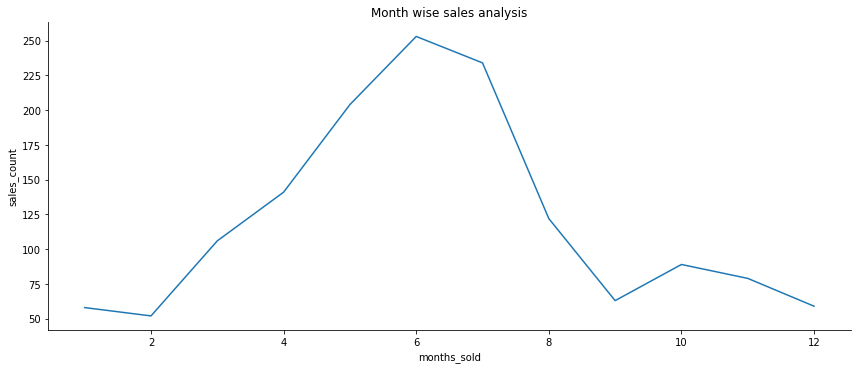

In [343]:
#SCT month_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select MoSold as months_sold, count(1) as sales_count
from Sale
group by MoSold
order by sales_count desc
							
                    '''

df_month_count_sold = pd.read_sql_query(master_statement, conn)
sns.relplot(
    data=df_month_count_sold, 
    x="months_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Month wise sales analysis")



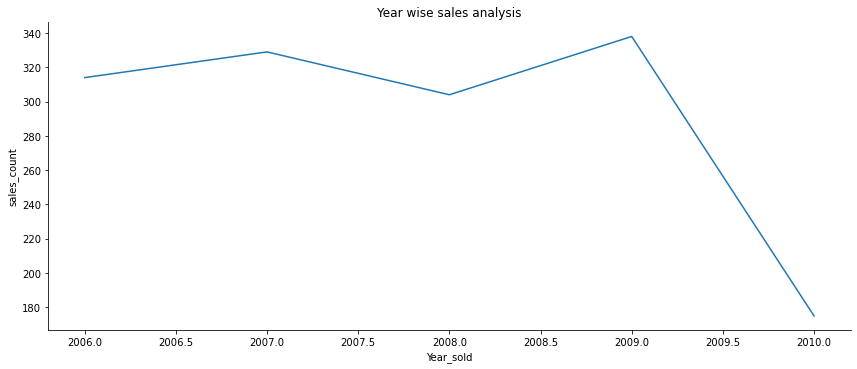

In [344]:
#SCT year_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select YrSold as Year_sold, count(1) as sales_count
from Sale
group by YrSold
order by sales_count desc
							
                    '''

df_year_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_year_count_sold, 
    x="Year_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Year wise sales analysis")




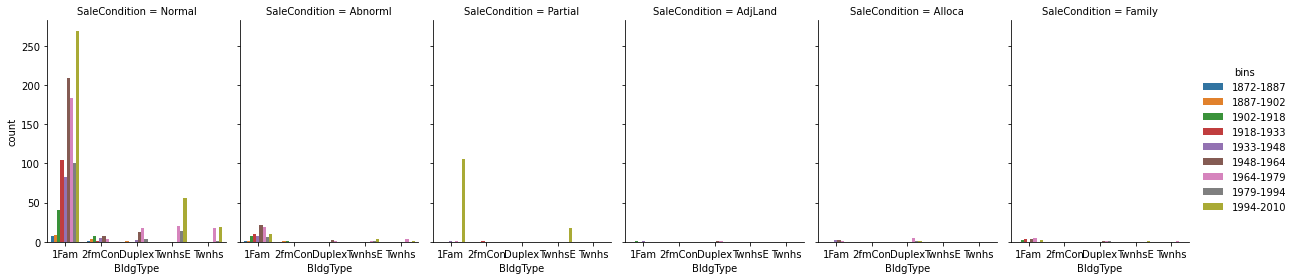

In [345]:
#SCT SaleCondition_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select SaleCondition, YearBuilt, BldgType
FROM Sale NATURAL JOIN Construction NATURAL JOIN Dwelling
							
                    '''

sale_conditions_df = pd.read_sql_query(master_statement, conn)

import seaborn as sns
min_value = sale_conditions_df['YearBuilt'].min()
max_value = sale_conditions_df['YearBuilt'].max()

import numpy as np
bins =np.linspace(min_value,max_value,10)
bins =[int(i) for i in bins]

labels = []
for ind,i in enumerate(bins):
    try:
        labels.append(str(i)+'-'+str(bins[ind+1]))
    except:
        pass
sale_conditions_df['bins'] = pd.cut(sale_conditions_df['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

g = sns.catplot(hue="bins", x="BldgType", col="SaleCondition",
                data=sale_conditions_df, kind="count",
                height=4, aspect=.7)

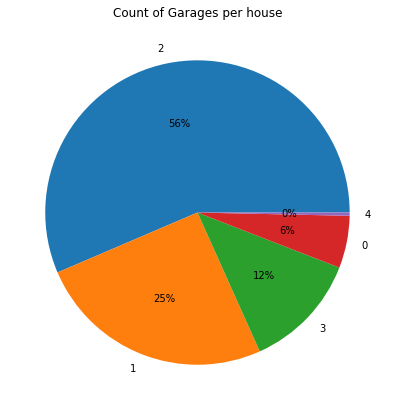

In [346]:
#SCT GarageCars
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, LotArea, SalePrice/LotArea
from Sale NATURAL JOIN Utility NATURAL JOIN Area
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)
value_counts_garage = pd.DataFrame(df_GarageCars_count_sold.GarageCars.value_counts(normalize = True))
value_counts_garage['GarageCars']
value_counts_garage.index
from matplotlib import pyplot as plt
import numpy as np
cars = value_counts_garage.index
data = value_counts_garage['GarageCars']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars,   autopct=lambda p: '{:.0f}%'.format(p))
plt.title('Count of Garages per house')
plt.show()


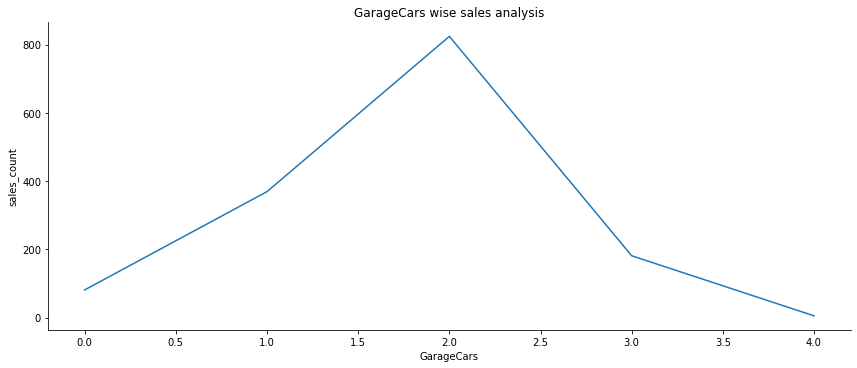

In [347]:
#SCT GarageCars_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, count(1) as sales_count
from Sale JOIN Utility ON Sale.Id = Utility.Id
group by GarageCars
order by sales_count desc
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_GarageCars_count_sold, 
    x="GarageCars", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="GarageCars wise sales analysis")
# df_year_count_sold['YearBuilt'].unique()
# df_year_count_sold.to_csv('GarageCars_count.csv')
# df_GarageCars_count_sold


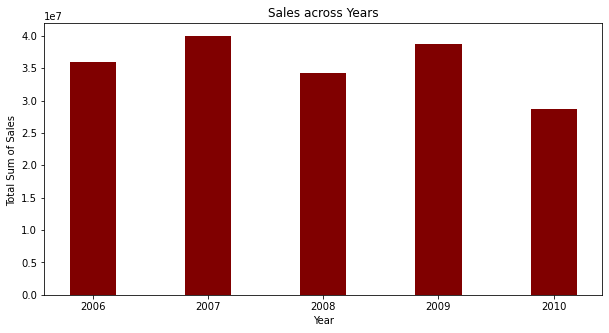

In [348]:
#SCT month_sold_ranking_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select * from
(
select YrSold,MoSold, price_sum, row_number() over (partition by YrSold order by price_sum desc) as ranking
from (
select YrSold, MoSold, sum(SalePrice) as price_sum 
from Sale
group by YrSold, MoSold
)  a
) b
where ranking <=5 
order by YrSold,ranking
							
                    '''

month_sold_ranking_count_sold = pd.read_sql_query(master_statement, conn)
groups = month_sold_ranking_count_sold.groupby(['YrSold'])['price_sum'].sum()
sales = pd.DataFrame(groups)
import numpy as np
import matplotlib.pyplot as plt
years = sales.index
values = sales['price_sum']
fig = plt.figure(figsize = (10, 5))
plt.bar(years, values, color ='maroon',
width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Sum of Sales ")
plt.title("Sales across Years")
plt.show()

In [292]:
master_statement  = '''
                        SELECT * FROM 
                            Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
                    '''
master_statement2  = '''
                        SELECT LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea, OverallQual, GarageCars from Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
							
                    '''

df = pd.read_sql_query(master_statement, conn)
df.drop(['Aeminities_id'], axis= 1, inplace=True)

df.drop(['Area_id'], axis= 1, inplace=True)

df.drop(['Construction_id'], axis= 1, inplace=True)

df.drop(['Dwelling_id'], axis= 1, inplace=True)

df.drop(['Utility_id'], axis= 1, inplace=True)

In [293]:
list(df.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'Utilities',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'LotArea',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '_1stFlrSF',
 '_2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '_3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFin

In [294]:
df.head()

Id  MSSubClass MSZoning  LotFrontage Street Alley Utilities Neighborhood  \
0   1          60       RL         65.0   Pave  None    AllPub      CollgCr   
1   2          20       RL         80.0   Pave  None    AllPub      Veenker   
2   3          60       RL         68.0   Pave  None    AllPub      CollgCr   
3   4          70       RL         60.0   Pave  None    AllPub      Crawfor   
4   5          60       RL         84.0   Pave  None    AllPub      NoRidge   

  Condition1 Condition2  ... GarageCond PoolQC Fence MiscFeature MiscVal  \
0       Norm       Norm  ...         TA   None  None        None       0   
1      Feedr       Norm  ...         TA   None  None        None       0   
2       Norm       Norm  ...         TA   None  None        None       0   
3       Norm       Norm  ...         TA   None  None        None       0   
4       Norm       Norm  ...         TA   None  None        None       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 81 columns]

In [295]:
df.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
OverallCond       0
OverallQual       0
LandSlope         0
LotConfig         0
SalePrice         0
Length: 81, dtype: int64

In [296]:
X, y  = df.iloc[0:,0:85], df.iloc[0:,85:86]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   Utilities      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1459 non-null   object 
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [298]:
DATA=df
DATA['MSZoning'].fillna("RL", inplace=True)
DATA.LotFrontage.fillna(0, inplace=True)
DATA.Alley.fillna("NO", inplace=True)
DATA.Utilities.fillna('AllPub', inplace=True)
DATA.Exterior1st.fillna("VinylSd", inplace=True)
DATA.Exterior2nd.fillna("VinylSd", inplace=True)
DATA.MasVnrArea.fillna(0., inplace=True)
DATA.BsmtCond.fillna("No", inplace=True)
DATA.BsmtExposure.fillna("NB", inplace=True)
DATA.BsmtFinType1.fillna("NB", inplace=True)
DATA.BsmtFinSF1.fillna(0., inplace=True)
DATA.BsmtFinSF2.fillna(0., inplace=True)
DATA.BsmtUnfSF.fillna(0., inplace=True)
DATA.TotalBsmtSF.fillna(0., inplace=True)
DATA.Electrical.fillna("SBrkr", inplace=True)
DATA.BsmtFullBath.fillna(0., inplace=True)
DATA.BsmtHalfBath.fillna(0., inplace=True)
DATA.KitchenQual.fillna("TA", inplace=True)
DATA.Functional.fillna('Typ', inplace=True)
DATA.FireplaceQu.fillna("No", inplace=True)
DATA.GarageType.fillna("No", inplace=True)
DATA.GarageYrBlt.fillna(0, inplace=True)
DATA.GarageFinish.fillna("No", inplace=True)
DATA.GarageCars.fillna(0, inplace=True)
DATA.GarageArea.fillna(0, inplace=True)
DATA.GarageQual.fillna("No", inplace=True)
DATA.GarageCond.fillna("No", inplace=True)
DATA.PoolQC.fillna("No", inplace=True)
DATA.Fence.fillna("No", inplace=True)
DATA.MiscFeature.fillna("No", inplace=True)
DATA.SaleType.fillna("Con", inplace=True)
DATA.SaleCondition.fillna("Normal", inplace=True)

DATA.BsmtFullBath.replace(3.0, 2.0, inplace=True)
DATA.BsmtFullBath = DATA.BsmtFullBath.astype('int')
DATA.BsmtHalfBath = DATA.BsmtHalfBath.astype('int')
DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([0, 1])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [299]:
DATA['GarageAgeCat']

0       recent
1          old
2       recent
3          old
4       recent
         ...  
1455       old
1456       old
1457       old
1458       old
1459       old
Name: GarageAgeCat, Length: 1460, dtype: object

In [300]:
DATA['LotFrontage'] = DATA.groupby(['Neighborhood', 'Street'])[
    'LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [301]:
DATA['KitchenAbvGr']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: KitchenAbvGr, Length: 1460, dtype: category
Categories (2, int64): [0 < 1]

In [302]:
# DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([1, 2])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [303]:
marks = {"No": 0, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}


def mark_to_num(mark):
    return marks[mark]


DATA['ExterQual'] = DATA['ExterQual'].apply(mark_to_num)
DATA['ExterCond'] = DATA['ExterCond'].apply(mark_to_num)
DATA['HeatingQC'] = DATA['HeatingQC'].apply(mark_to_num)
DATA['KitchenQual'] = DATA['KitchenQual'].apply(mark_to_num)
DATA['FireplaceQu'] = DATA['FireplaceQu'].apply(mark_to_num)
DATA['GarageQual'] = DATA['GarageQual'].apply(mark_to_num)
DATA['GarageCond'] = DATA['GarageCond'].apply(mark_to_num)
DATA['PoolQC'] = DATA['PoolQC'].apply(mark_to_num)


In [304]:
DATA.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'LotArea',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageTy

In [305]:
DATA['BsmtFinSF'] = DATA.BsmtFinSF1 + DATA.BsmtFinSF2
DATA['Porch'] = DATA.ScreenPorch + DATA.EnclosedPorch + \
    DATA.OpenPorchSF + DATA.WoodDeckSF
DATA['Total_surface'] = DATA.TotalBsmtSF + DATA['_1stFlrSF'] + DATA['_2ndFlrSF']
DATA['Age'] = DATA.YrSold - DATA.YearBuilt
DATA['RemodAge'] = DATA.YrSold - DATA.YearRemodAdd
DATA['GarageAge'] = DATA.YrSold - DATA.GarageYrBlt


DATA['Overall'] = DATA['OverallCond'] * DATA.OverallQual
DATA['External_Overall'] = DATA['ExterCond'] * DATA['ExterQual']


In [306]:


drop_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
             'MiscVal', 'MoSold', 'YrSold', '_1stFlrSF', '_2ndFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
numeric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
               'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
               'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotConfig', 'GarageAgeCat', 'Utilities']
DATA.drop(drop_cols, axis=1, inplace=True)
DATA[categorical] = DATA[categorical].astype('category')
DATA[numeric] = DATA[numeric].astype('float')


In [307]:
numeric1 = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge','SalesPrice']

In [308]:
# sns.pairplot(DATA[numeric])


<AxesSubplot:>

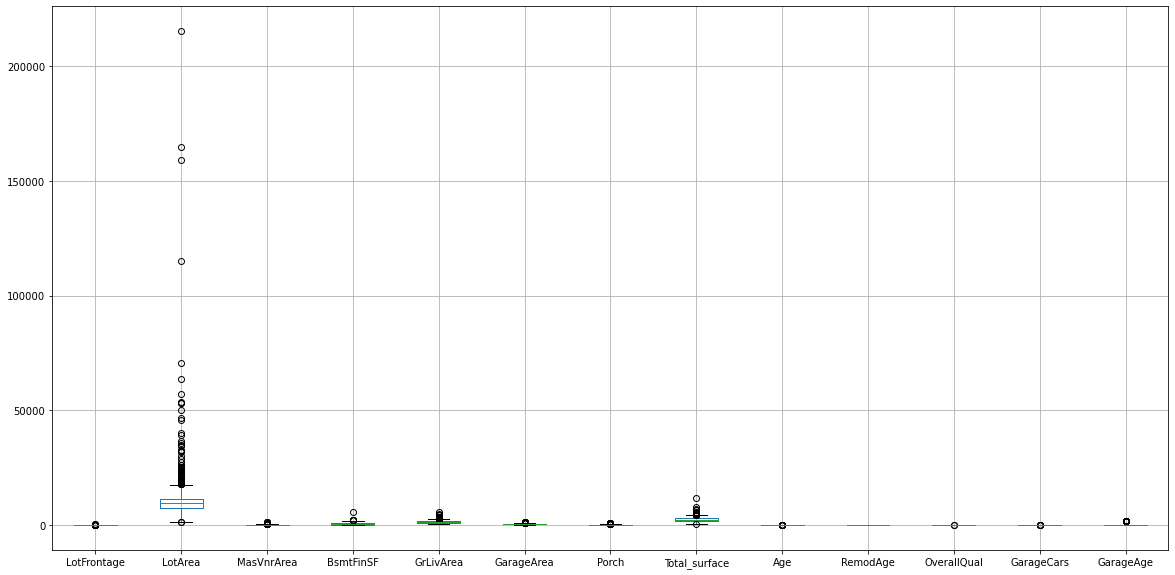

In [309]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 10))

DATA[numeric].boxplot()


In [310]:
DATA[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF      1460 non-null   float64
 4   GrLivArea      1460 non-null   float64
 5   GarageArea     1460 non-null   float64
 6   Porch          1460 non-null   float64
 7   Total_surface  1460 non-null   float64
 8   Age            1460 non-null   float64
 9   RemodAge       1460 non-null   float64
 10  OverallQual    1460 non-null   float64
 11  GarageCars     1460 non-null   float64
 12  GarageAge      1460 non-null   float64
dtypes: float64(13)
memory usage: 148.4 KB


0.0 104.0
3311.7000000000003 17401.149999999998
0.0 456.0
0.0 1309.0
848.0 2466.1
0.0 850.0999999999999
0.0 462.1999999999998
1535.95 3973.3999999999996
1.0 91.0
0.0 58.0
4.0 8.0
0.0 3.0
0.0 2006.0


<AxesSubplot:>

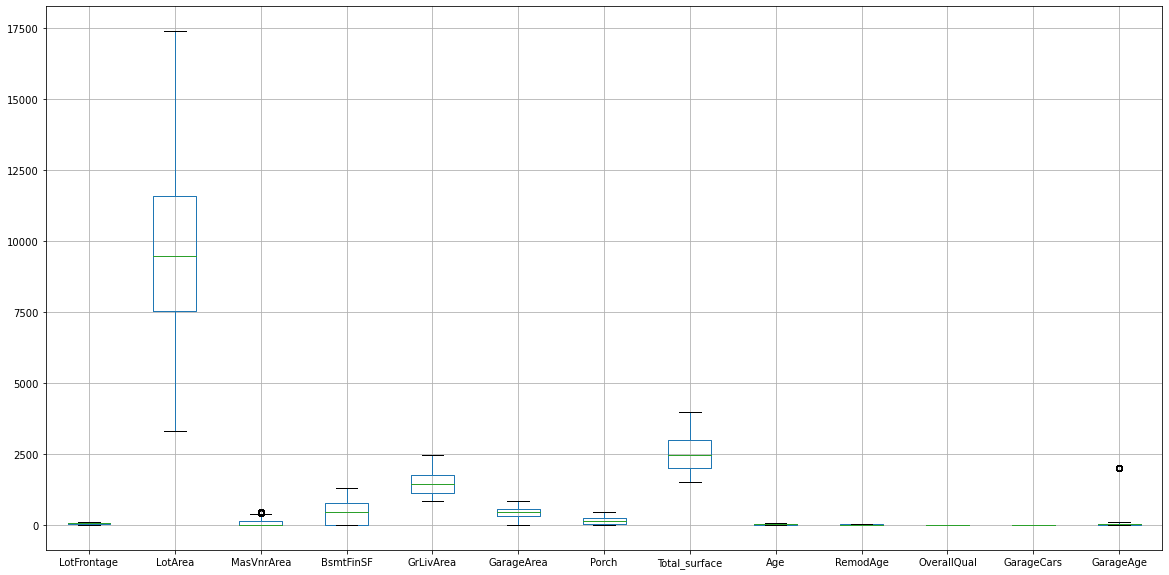

In [311]:

for i in numeric:
    lower = df[i].quantile(.05)
    upper = df[i].quantile(.95)
    print(lower, upper)
    DATA[i] = DATA[i].clip(lower=lower, upper=upper)
    
DATA[numeric].boxplot()


In [312]:
# sns.heatmap(DATA[numeric])

In [313]:
len(categorical)


50

In [314]:
DATA.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [315]:
l = numeric

l.append('SalePrice')


<AxesSubplot:>

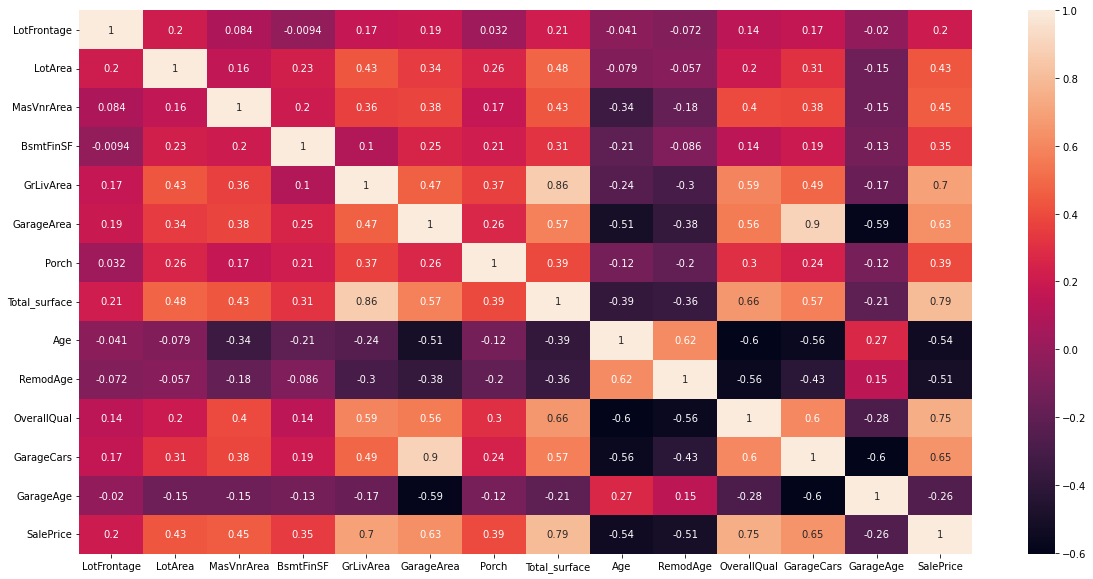

In [316]:


sns.heatmap(DATA[l].corr(),annot=True)


<AxesSubplot:ylabel='Frequency'>

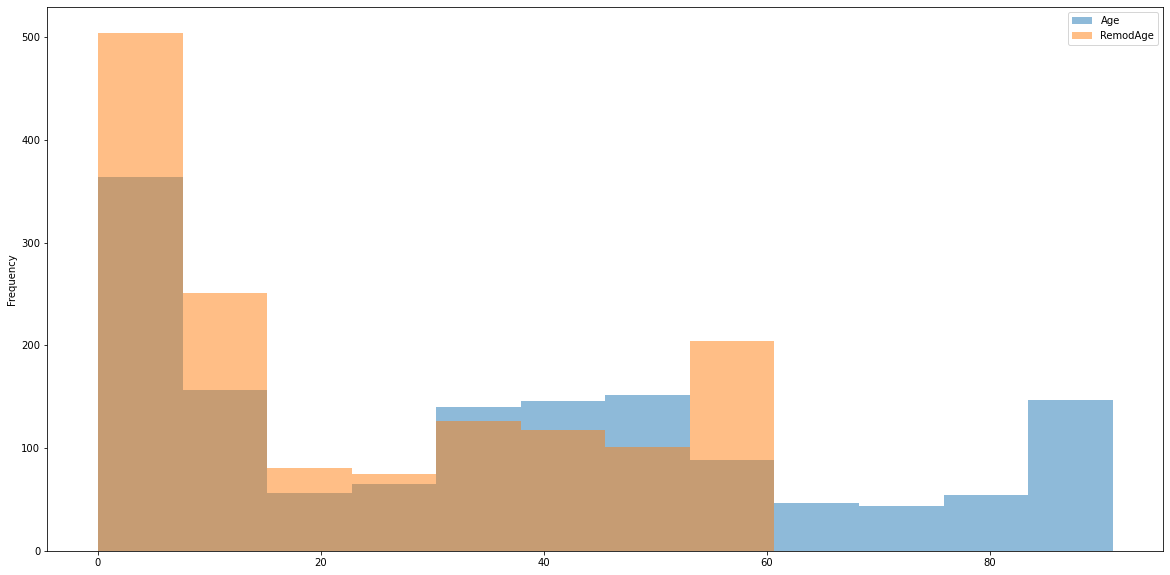

In [317]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


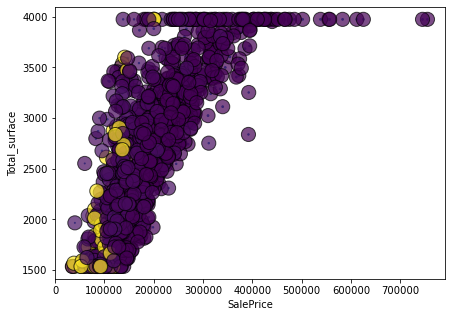

In [318]:
# plt.bar(DATA[['Age','GarageCars']])
DATA.plot.scatter('SalePrice', 'Total_surface', 'GarageCars', marker='o', figsize=(7,5))
plt.scatter(DATA.SalePrice, DATA.Total_surface,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=DATA.GarageAge)

Text(0.5, 0, 'y-Total_surface')

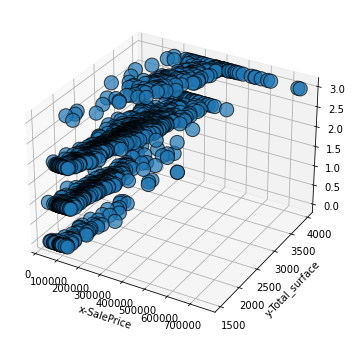

In [319]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(DATA.SalePrice, DATA.Total_surface,DATA.GarageCars,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           )
plt.xlabel("x-SalePrice")
plt.ylabel("y-Total_surface")
# plt.set_zlabel("y-GarageCars")


<AxesSubplot:xlabel='GrLivArea', ylabel='Total_surface'>

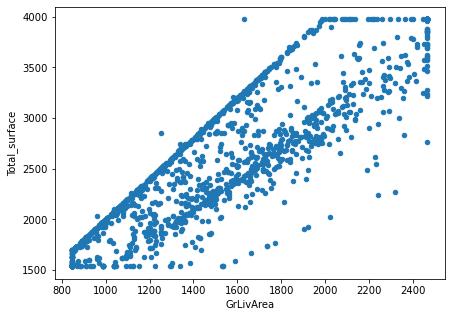

In [320]:
DATA.plot.scatter(x='GrLivArea', y='Total_surface', marker='o', figsize=(7,5))


<AxesSubplot:ylabel='Frequency'>

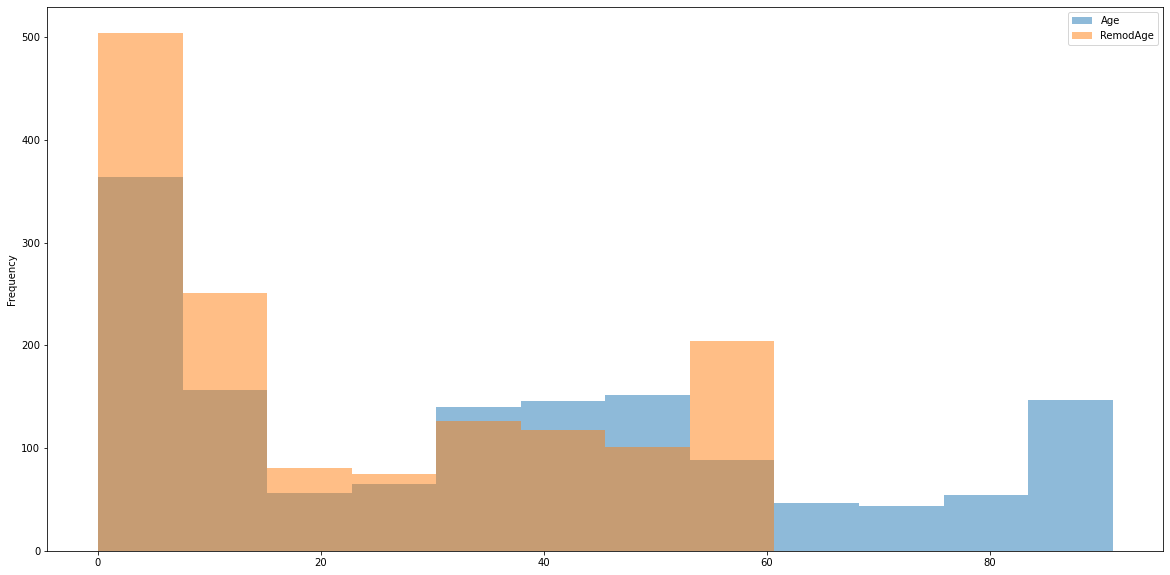

In [321]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


In [322]:
Full_Data = DATA

In [323]:
#Full_Data = Full_Data.select_dtypes(exclude=['category'])

In [324]:
Full_Data.shape

(1460, 72)

In [325]:
Full_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'LotArea', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GrLivArea', 'PavedDrive', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice',
       'GarageAgeCat', 'BsmtFinSF', 'Porch', 'Total_s

In [326]:
Full_Data = Full_Data.drop(['Exterior1st', 'Exterior2nd', 'Condition1', 'Condition2'], axis = 1)

In [327]:
Full_Data = pd.get_dummies(Full_Data)

In [328]:
col = list(Full_Data.columns)

In [329]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
Full_Data = min_max_scaler.fit_transform(Full_Data)
Full_Data = pd.DataFrame(Full_Data, columns=col)

In [330]:
Full_Data

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
0     0.000000     0.625000         0.75    0.429825  0.364691   0.532724   
1     0.000685     0.769231         0.50    0.000000  0.446313   0.255856   
2     0.001371     0.653846         0.75    0.355263  0.563422   0.579692   
3     0.002056     0.576923         0.75    0.000000  0.442764   0.537050   
4     0.002742     0.807692         1.00    0.767544  0.777057   0.834312   
...        ...          ...          ...         ...       ...        ...   
1455  0.997258     0.596154         0.50    0.000000  0.326862   0.493789   
1456  0.997944     0.817308         0.50    0.260965  0.700049   0.757061   
1457  0.998629     0.634615         0.75    0.000000  0.406709   0.922069   
1458  0.999315     0.653846         0.25    0.000000  0.454617   0.142142   
1459  1.000000     0.721154         0.25    0.000000  0.470231   0.252148   

      GarageYrBlt  GarageCars  GarageArea  SalePrice  ...  SaleType_Oth  \
0        0.996517    0.666667    0.644630   0.241078  ...           0.0   
1        0.983085    0.666667    0.541113   0.203583  ...           0.0   
2        0.995522    0.666667    0.715210   0.261908  ...           0.0   
3        0.994030    1.000000    0.755205   0.145952  ...           0.0   
4        0.995025    1.000000    0.983414   0.298709  ...           0.0   
...           ...         ...         ...        ...  ...           ...   
1455     0.994527    0.666667    0.541113   0.194556  ...           0.0   
1456     0.984080    0.666667    0.588166   0.243161  ...           0.0   
1457     0.965672    0.333333    0.296436   0.321622  ...           0.0   
1458     0.970149    0.333333    0.282320   0.148903  ...           0.0   
1459     0.977612    0.333333    0.324668   0.156367  ...           0.0   

      SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             1.0                    0.0                    0.0   
1             1.0                    0.0                    0.0   
2             1.0                    0.0                    0.0   
3             1.0                    1.0                    0.0   
4             1.0                    0.0                    0.0   
...           ...                    ...                    ...   
1455          1.0                    0.0                    0.0   
1456          1.0                    0.0                    0.0   
1457          1.0                    0.0                    0.0   
1458          1.0                    0.0                    0.0   
1459          1.0                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                      0.0                   0.0                   1.0   
1                      0.0                   0.0                   1.0   
2                      0.0                   0.0                   1.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
1455                   0.0                   0.0                   1.0   
1456                   0.0                   0.0                   1.0   
1457                   0.0                   0.0                   1.0   
1458                   0.0                   0.0                   1.0   
1459                   0.0                   0.0                   1.0   

      SaleCondition_Partial  GarageAgeCat_old  GarageAgeCat_recent  
0                       0.0               0.0                  1.0  
1                       0.0               1.0                  0.0  
2                       0.0               0.0                  1.0  
3                       0.0               1.0                  0.0  
4                       0.0               0.0                  1.0  
...                     ...               ...                  ...  
1455     

In [331]:
x=Full_Data
x=x.drop('SalePrice',axis=1)
x
y=Full_Data['SalePrice']

# Break off validation set from training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [332]:
x.isnull().sum().sort_values(ascending = False)

Id                     0
BsmtExposure_Gd        0
BsmtFinType1_GLQ       0
BsmtFinType1_BLQ       0
BsmtFinType1_ALQ       0
                      ..
Electrical_FuseA       0
CentralAir_Y           0
CentralAir_N           0
HeatingQC_5            0
GarageAgeCat_recent    0
Length: 287, dtype: int64

In [333]:
x.head()

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
0  0.000000     0.625000         0.75    0.429825  0.364691   0.532724   
1  0.000685     0.769231         0.50    0.000000  0.446313   0.255856   
2  0.001371     0.653846         0.75    0.355263  0.563422   0.579692   
3  0.002056     0.576923         0.75    0.000000  0.442764   0.537050   
4  0.002742     0.807692         1.00    0.767544  0.777057   0.834312   

   GarageYrBlt  GarageCars  GarageArea  BsmtFinSF  ...  SaleType_Oth  \
0     0.996517    0.666667    0.644630   0.539343  ...           0.0   
1     0.983085    0.666667    0.541113   0.747135  ...           0.0   
2     0.995522    0.666667    0.715210   0.371276  ...           0.0   
3     0.994030    1.000000    0.755205   0.165011  ...           0.0   
4     0.995025    1.000000    0.983414   0.500382  ...           0.0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0          1.0                    0.0                    0.0   
1          1.0                    0.0                    0.0   
2          1.0                    0.0                    0.0   
3          1.0                    1.0                    0.0   
4          1.0                    0.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  GarageAgeCat_old  GarageAgeCat_recent  
0                    0.0               0.0                  1.0  
1                    0.0               1.0                  0.0  
2                    0.0               0.0                  1.0  
3                    0.0               1.0                  0.0  
4                    0.0               0.0                  1.0  

[5 rows x 287 columns]

In [334]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [335]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

In [336]:
X_train

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
618   0.423578     0.865385         1.00    0.991228  0.594935   0.605649   
870   0.596299     0.576923         0.25    0.000000  0.233387   0.028428   
92    0.063057     0.769231         0.25    0.000000  0.713179   0.071689   
817   0.559973     0.000000         1.00    0.324561  0.706436   0.519745   
302   0.206991     1.000000         0.75    0.328947  0.737594   0.428280   
...        ...          ...          ...         ...       ...        ...   
763   0.522961     0.788462         1.00    1.000000  0.434247   0.937519   
835   0.572310     0.576923         0.00    0.000000  0.446313   0.135344   
1216  0.833448     0.653846         0.50    0.000000  0.398759   0.651381   
559   0.383139     0.000000         0.75    0.039474  0.000000   0.438168   
684   0.468814     0.557692         0.75    0.065789  0.955204   0.612447   

      GarageYrBlt  GarageCars  GarageArea  BsmtFinSF  ...  SaleType_Oth  \
618      0.998507    1.000000    0.910481   0.036669  ...           0.0   
870      0.976119    0.333333    0.362310   0.000000  ...           0.0   
92       0.955721    0.666667    0.508176   0.544691  ...           0.0   
817      0.996020    1.000000    1.000000   0.930481  ...           0.0   
302      0.995522    1.000000    0.991648   0.000000  ...           0.0   
...           ...         ...         ...        ...  ...           ...   
763      0.994527    1.000000    1.000000   0.888464  ...           0.0   
835      0.993035    0.666667    0.512881   0.337662  ...           0.0   
1216     0.984080    0.666667    0.634043   0.000000  ...           0.0   
559      0.996517    0.666667    0.494060   0.000000  ...           0.0   
684      0.994030    0.666667    0.571697   0.000000  ...           0.0   

      SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
618           0.0                    0.0                    0.0   
870           1.0                    0.0                    0.0   
92            1.0                    0.0                    0.0   
817           1.0                    0.0                    0.0   
302           1.0                    0.0                    0.0   
...           ...                    ...                    ...   
763           1.0                    0.0                    0.0   
835           1.0                    0.0                    0.0   
1216          1.0                    0.0                    0.0   
559           1.0                    0.0                    0.0   
684           1.0                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
618                    0.0                   0.0                   0.0   
870                    0.0                   0.0                   1.0   
92                     0.0                   0.0                   1.0   
817                    0.0                   0.0                   1.0   
302                    0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
763                    0.0                   0.0                   1.0   
835                    0.0                   0.0                   1.0   
1216                   0.0                   0.0                   1.0   
559                    0.0                   0.0                   1.0   
684                    0.0                   0.0                   1.0   

      SaleCondition_Partial  GarageAgeCat_old  GarageAgeCat_recent  
618                     1.0               0.0                  1.0  
870                     0.0               1.0                  0.0  
92                      0.0               1.0                  0.0  
817                     0.0               0.0                  1.0  
302                     0.0               0.0                  1.0  
...                     ...               ...                  ...  
763      

In [337]:
svr = SVR(C=20, epsilon = 0.008, gamma= 0.0003)
svr_model = svr.fit(X_train, y_train)
svr_predict = svr_model.predict(X_valid)
print(mean_squared_error(y_valid, svr_predict))

0.0026052682610555288


In [338]:
rigid = Ridge(alpha = 1)
rigid_model = rigid.fit(X_train, y_train)
rigid_pred = rigid_model.predict(X_valid)
print(mean_squared_error(y_valid, rigid_pred))

0.0026945320567811483


In [339]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print("RMSE (random forest approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (random forest approach):
0.00214400410798905


In [340]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR.fit(X_train, y_train)
GBR_preds = GBR.predict(X_valid)
print("RMSE (Gradient Boosting approach):")
print(mean_squared_error(y_valid, GBR_preds))


RMSE (Gradient Boosting approach):
0.0017215635511539293


In [341]:
ABR = AdaBoostRegressor(n_estimators=100, random_state=0)
ABR.fit(X_train, y_train)
ABR_preds = ABR.predict(X_valid)
print("RMSE (AdaBoost approach):")
print(mean_squared_error(y_valid, ABR_preds))

RMSE (AdaBoost approach):
0.0025667228410067465


In [342]:
BR = BaggingRegressor(n_estimators=100, random_state=0)
BR.fit(X_train, y_train)
BR_preds = BR.predict(X_valid)
print("RMSE (BaggingRegression approach):")
print(mean_squared_error(y_valid, BR_preds))

RMSE (BaggingRegression approach):
0.002089475530809035


from xgboost 

In [ ]:
DATA['']